In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import gc
gc.enable()
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import gc
gc.enable()
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
data = pd.read_csv('clinic_data.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        200 non-null    int64  
 1   Gender                     200 non-null    object 
 2   Ethnicity                  200 non-null    object 
 3   Medical History            200 non-null    object 
 4   Medications                200 non-null    object 
 5   Lifestyle Factors          200 non-null    object 
 6   Blood Pressure (mmHg)      200 non-null    object 
 7   BMI                        200 non-null    float64
 8   Cholesterol Level (mg/dL)  200 non-null    int64  
 9   Smoking                    200 non-null    object 
 10  Alcohol Consumption        200 non-null    object 
 11  Physical Activity Level    200 non-null    object 
 12  Family History of Stroke   200 non-null    object 
 13  Imaging Modality           200 non-null    object 

In [7]:
data.head()

,Age,Gender,Ethnicity,Medical History,Medications,Lifestyle Factors,Blood Pressure (mmHg),BMI,Cholesterol Level (mg/dL),Smoking,Alcohol Consumption,Physical Activity Level,Family History of Stroke,Imaging Modality,Stroke Diagnosis,Lesion Location,Lesion Size (cm),Scan Quality,Notes
0,73,Female,Hausa,Hyperlipidemia,Metformin,"Non-smoker, non-drinker",168/86,30.4,264,Yes,Yes,Low,Yes,CT,Yes,Left Hemisphere,3.81,Poor,Further examination required
1,59,Male,Hausa,Hypertension,"Lisinopril, Atorvastatin","Smoker, regular alcohol consumption",158/104,28.0,156,Yes,No,Moderate,No,MRI,No,Cerebellum,1.44,Poor,Confirmed stroke
2,52,Male,Hausa,"Hypertension, Diabetes, Hyperlipidemia",Metformin,"Smoker, regular alcohol consumption",151/83,31.2,152,Yes,Yes,Low,No,CT,No,Multiple,2.94,Poor,Minor abnormalities
3,65,Female,Hausa,Hypertension,Atorvastatin,"Non-smoker, non-drinker",143/115,33.7,260,Yes,No,Low,No,CT,No,Cerebellum,3.63,Moderate,Confirmed stroke
4,63,Male,Yoruba,"Hypertension, Diabetes, Hyperlipidemia",Metformin,"Smoker, regular alcohol consumption",142/85,28.8,256,Yes,Yes,Moderate,Yes,CT,No,Multiple,1.53,Moderate,Minor abnormalities


In [8]:
data.isna().sum()

,0
Age,0
Gender,0
Ethnicity,0
Medical History,0
Medications,0
Lifestyle Factors,0
Blood Pressure (mmHg),0
BMI,0
Cholesterol Level (mg/dL),0
Smoking,0


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,61.4500,10.309166,45.00,52.0000,61.500,69.0000,79.00
BMI,200.0,27.6780,4.074571,20.00,24.5750,28.000,30.9750,34.80
Cholesterol Level (mg/dL),200.0,222.5300,45.783290,150.00,181.5000,221.500,262.0000,299.00
Lesion Size (cm),200.0,2.8215,1.288111,0.52,1.7575,2.735,3.8525,4.98


<Axes: xlabel='Stroke Diagnosis', ylabel='Count'>

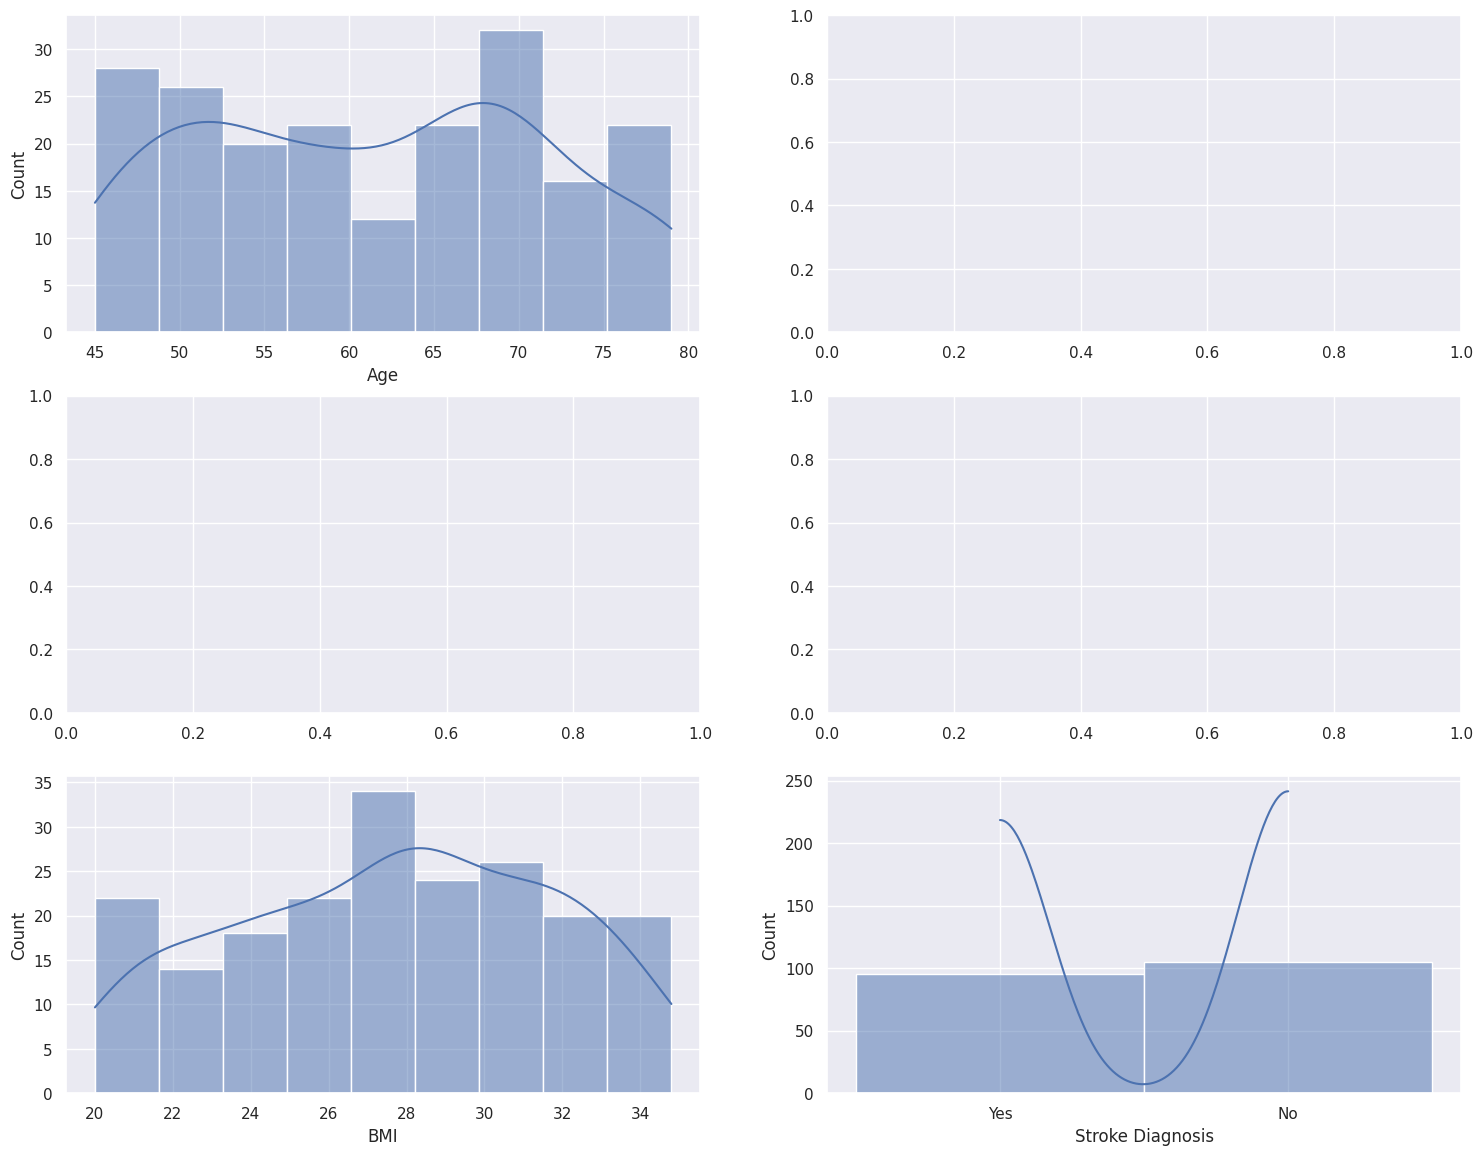

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 14))
sns.histplot(data=data, x="Age", kde=True,ax=axes[0][0])
#sns.histplot(data=data, x="hypertension", kde=True,ax=axes[0][1])
#sns.histplot(data=data, x="heart_disease", kde=True,ax=axes[1][0])
#sns.histplot(data=data, x="avg_glucose_level", kde=True,ax=axes[1][1])
sns.histplot(data=data, x="BMI", kde=True,ax=axes[2][0])
sns.histplot(data=data, x="Stroke Diagnosis", kde=True,ax=axes[2][1])

<ipython-input-14-683af596e251>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,palette="Set3", x="Gender",ax=axes[0][0])
<ipython-input-14-683af596e251>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,palette="Set3", x="Smoking",ax=axes[2][0])


<Axes: xlabel='Stroke Diagnosis', ylabel='Count'>

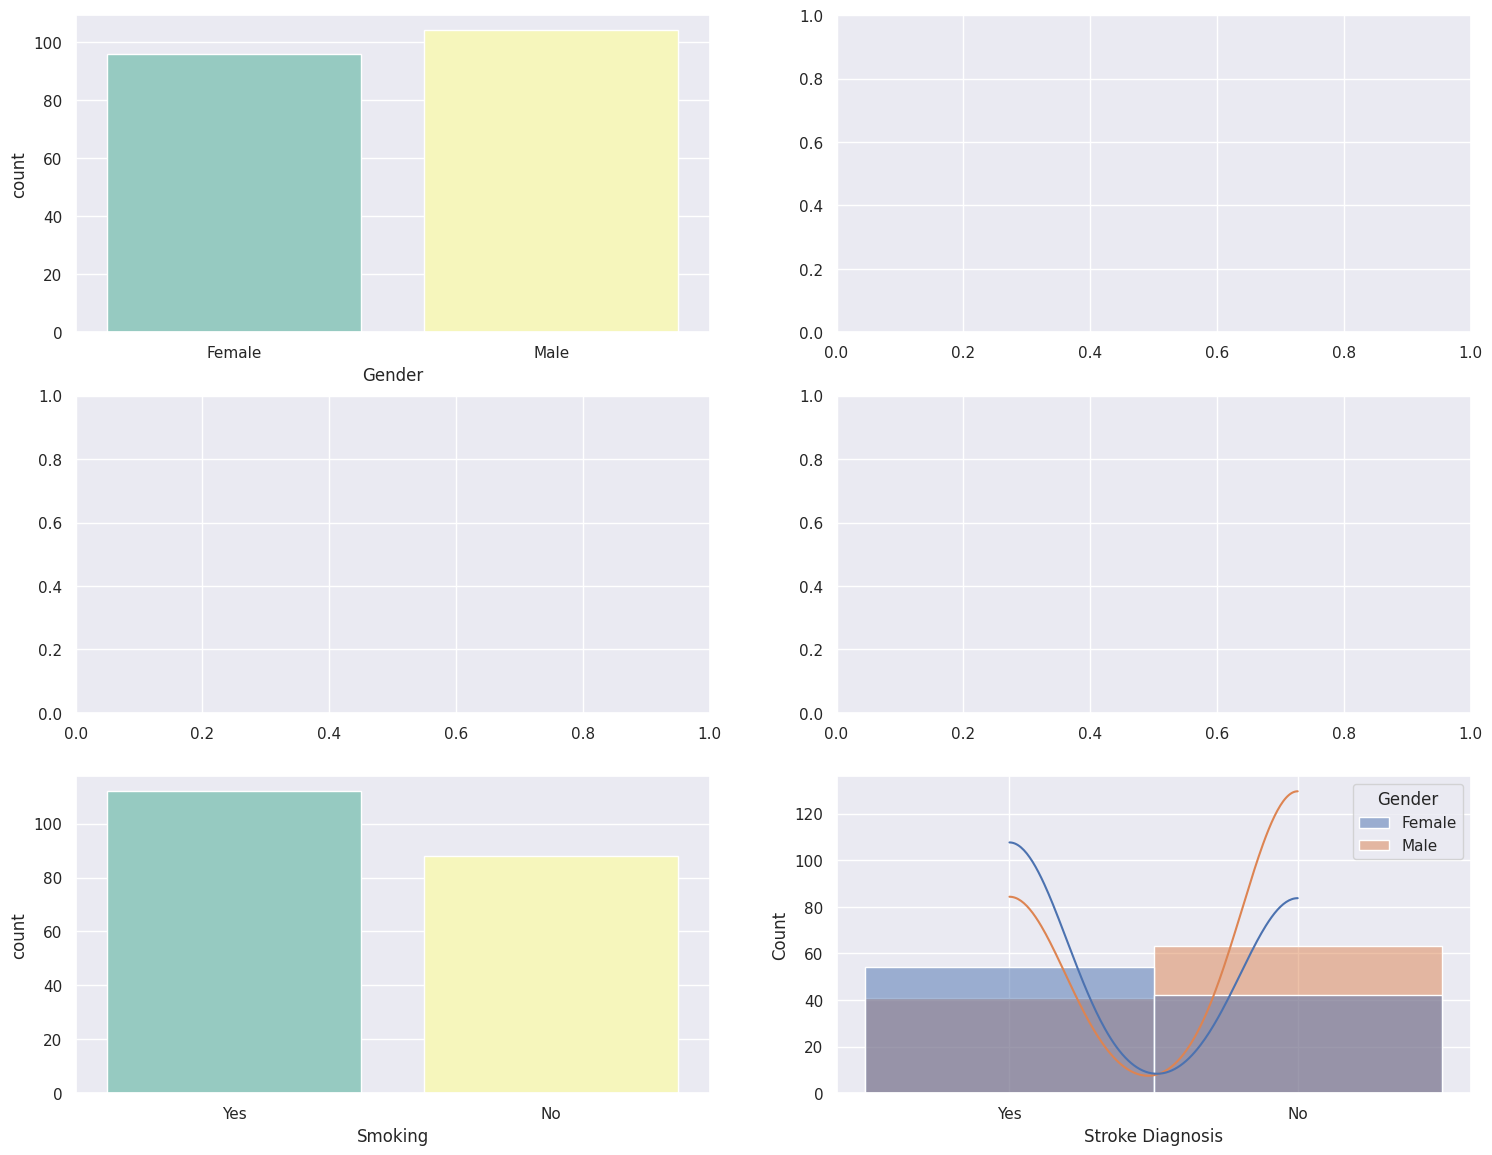

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 14))
sns.countplot(data=data,palette="Set3", x="Gender",ax=axes[0][0])
#sns.countplot(data=data,palette="Set3", x="ever_married",ax=axes[0][1])
#sns.countplot(data=data,palette="Set3", x="work_type",ax=axes[1][0])
#sns.countplot(data=data,palette="Set3", x="Residence_type",ax=axes[1][1])
sns.countplot(data=data,palette="Set3", x="Smoking",ax=axes[2][0])
sns.histplot(data=data, x="Stroke Diagnosis",hue="Gender", kde=True,ax=axes[2][1])

In [ ]:
#report = pdp.ProfileReport(data, title="Stroke Report",minimal=True)

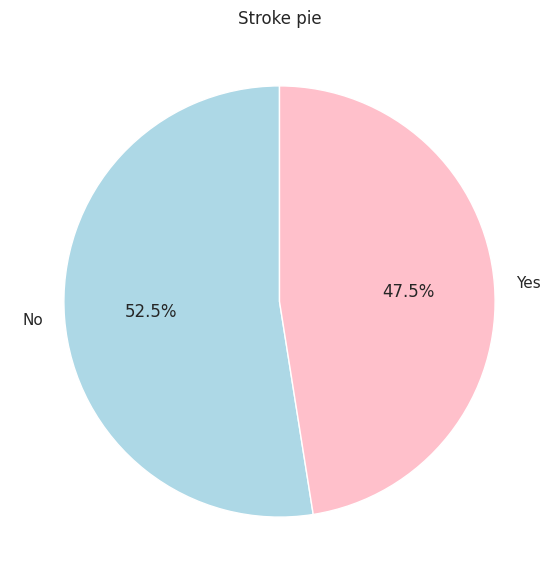

In [15]:
labels =data['Stroke Diagnosis'].value_counts(sort = True).index
sizes = data['Stroke Diagnosis'].value_counts(sort = True)
colors = ["lightblue","pink"]
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,)
plt.title('Stroke pie')
plt.show()

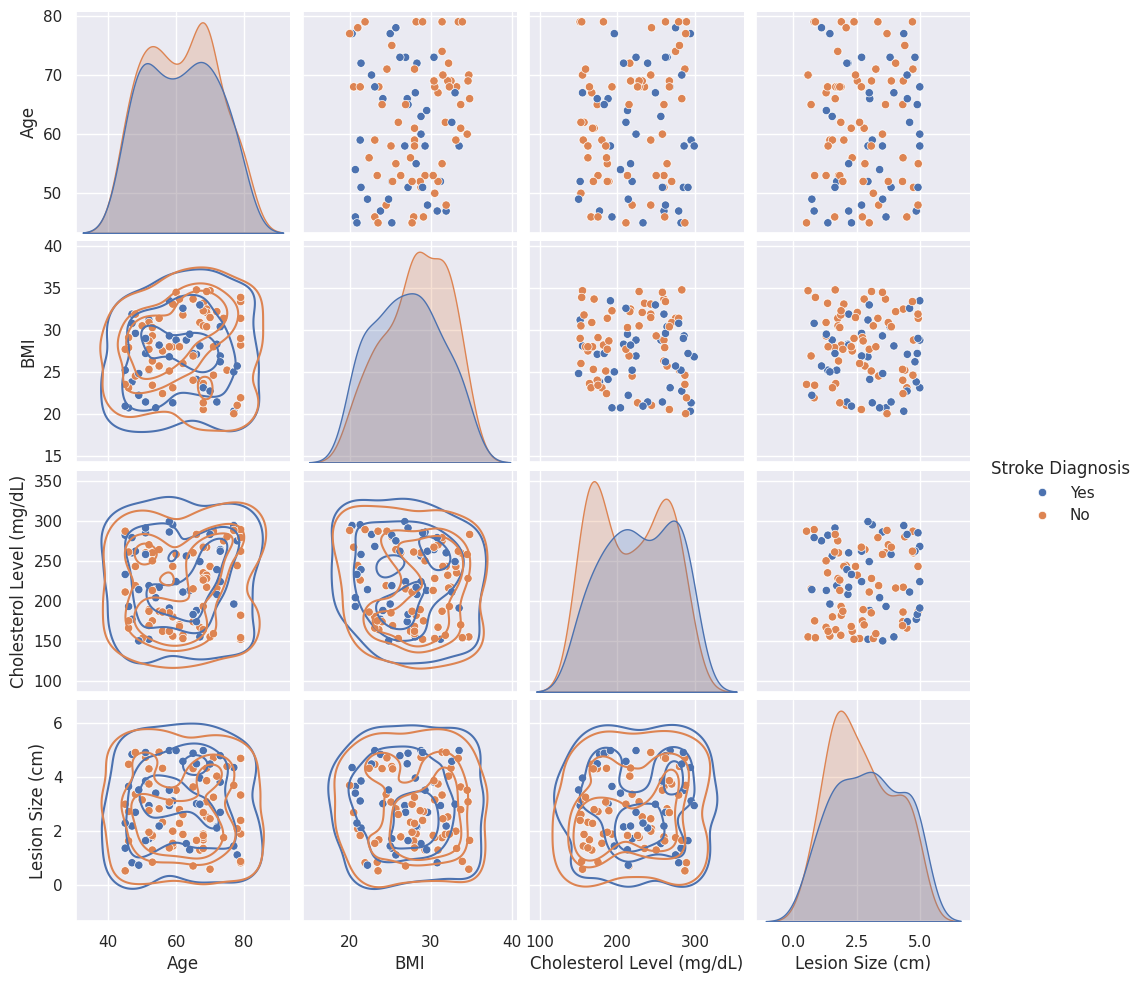

In [16]:
g = sns.pairplot(data, diag_kind="kde",hue="Stroke Diagnosis")
g.map_lower(sns.kdeplot, levels=4, color=".2")